# GEREKLİ KÜTÜPHANELERİ YÜKLEME

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,roc_auc_score,confusion_matrix
from sklearn.model_selection import cross_val_score,cross_validate,train_test_split

# VERİ OKUMA VE İLK 10 SATIR

In [2]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [4]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
df.shape

(2111, 17)

# EKSİK DEĞER KONTROLÜ

In [6]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# SAYISAL ÖZELLİKLERİN İSTATİSTİKSEL İNCELEMESİ

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# ÖZELLİKLERİN VERİ TİPLERİNİN İNCELENMESİ

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

# KATEGORİK VERİLERİ SAYISALLAŞTIRMA

In [9]:
 df['Gender'] = df['Gender'].astype(str).str.strip().str.capitalize()

In [10]:
 df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [11]:
print(df['Gender'].unique())

[0 1]


In [14]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,0,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,1,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,1,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,1,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,0,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,0,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,0,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [15]:
le1=LabelEncoder()
df["FAVC"]=le1.fit_transform(df["FAVC"]) # 0 : no , 1 : yes

# FAVC: Yüksek kalorili yiyecekleri sık tüketiyor musunuz sorusuna cevabı evet olan bireylerin obezite olma oranı daha fazla bu yüzden oluşturacağımız modeller için önemli bir özellik

In [16]:
df.groupby("NObeyesdad")["FAVC"].value_counts()

NObeyesdad           FAVC
Insufficient_Weight  1       221
                     0        51
Normal_Weight        1       208
                     0        79
Obesity_Type_I       1       340
                     0        11
Obesity_Type_II      1       290
                     0         7
Obesity_Type_III     1       323
                     0         1
Overweight_Level_I   1       268
                     0        22
Overweight_Level_II  1       216
                     0        74
Name: count, dtype: int64

In [17]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,no,0,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,0,1.520000,56.000000,Sometimes,0,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,1,1.800000,77.000000,Frequently,0,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,1,1.800000,87.000000,Frequently,0,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,1,1.780000,89.800000,Sometimes,0,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,Sometimes,1,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,0,1.748584,133.742943,Sometimes,1,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,0,1.752206,133.689352,Sometimes,1,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,0,1.739450,133.346641,Sometimes,1,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


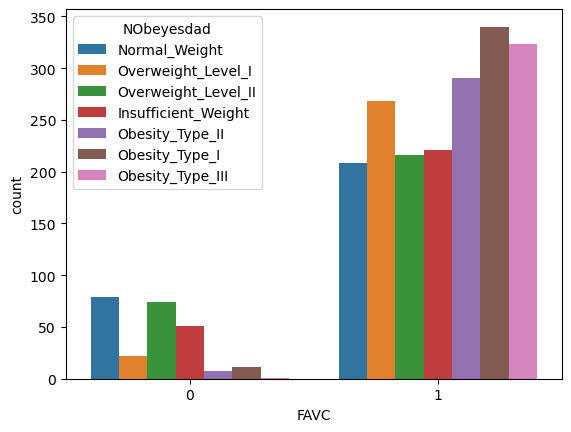

In [18]:
sns.countplot(x="FAVC",data=df,hue="NObeyesdad")
plt.show()

In [19]:
print(df['CALC'].unique())

['no' 'Sometimes' 'Frequently' 'Always']


# CALC: Ne sıklıkla alkol tüketiyorsunuz sorusuna verilen cevaptır. 

In [20]:
df['CALC'] = df['CALC'].str.strip().str.capitalize()

calc_map = {
    'No': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

df['CALC'] = df['CALC'].map(calc_map)

In [21]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,0,0,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,0,1.520000,56.000000,1,0,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,1,1.800000,77.000000,2,0,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,1,1.800000,87.000000,2,0,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,1,1.780000,89.800000,1,0,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,1,1,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,0,1.748584,133.742943,1,1,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,0,1.752206,133.689352,1,1,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,0,1.739450,133.346641,1,1,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [22]:
df.groupby("NObeyesdad")["CALC"].value_counts()

NObeyesdad           CALC
Insufficient_Weight  1       154
                     0       117
                     2         1
Normal_Weight        1       161
                     0       107
                     2        18
                     3         1
Obesity_Type_I       1       172
                     0       165
                     2        14
Obesity_Type_II      1       224
                     0        71
                     2         2
Obesity_Type_III     1       323
                     0         1
Overweight_Level_I   1       224
                     0        50
                     2        16
Overweight_Level_II  1       143
                     0       128
                     2        19
Name: count, dtype: int64

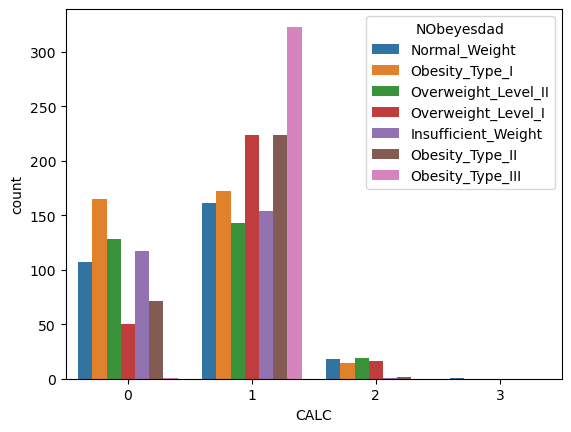

In [23]:
sns.countplot(x="CALC",hue="NObeyesdad",data=df)
plt.show()

In [24]:
print(df['CAEC'].unique())

['Sometimes' 'Frequently' 'Always' 'no']


# CAEC: Ana öğünler dışında atıştırmalık (abur cubur) yiyor musunuz sorusuna bireylerin verdiği cevaplardır.

In [25]:
df['CAEC'] = df['CAEC'].str.strip().str.capitalize()
caec_map = {
    'No': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

df['CAEC'] = df['CAEC'].map(caec_map)

In [26]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,0,1.620000,64.000000,0,0,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,1,Public_Transportation,Normal_Weight
1,21.000000,0,1.520000,56.000000,1,0,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,1,Public_Transportation,Normal_Weight
2,23.000000,1,1.800000,77.000000,2,0,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,1,Public_Transportation,Normal_Weight
3,27.000000,1,1.800000,87.000000,2,0,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,1,Walking,Overweight_Level_I
4,22.000000,1,1.780000,89.800000,1,0,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,1,1,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III
2107,21.982942,0,1.748584,133.742943,1,1,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III
2108,22.524036,0,1.752206,133.689352,1,1,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III
2109,24.361936,0,1.739450,133.346641,1,1,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III


In [27]:
df.groupby("NObeyesdad")["CAEC"].value_counts()

NObeyesdad           CAEC
Insufficient_Weight  1       146
                     2       121
                     0         3
                     3         2
Normal_Weight        1       159
                     2        83
                     3        35
                     0        10
Obesity_Type_I       1       338
                     2         6
                     3         6
                     0         1
Obesity_Type_II      1       293
                     3         2
                     0         1
                     2         1
Obesity_Type_III     1       323
                     2         1
Overweight_Level_I   1       236
                     0        35
                     2        14
                     3         5
Overweight_Level_II  1       270
                     2        16
                     3         3
                     0         1
Name: count, dtype: int64

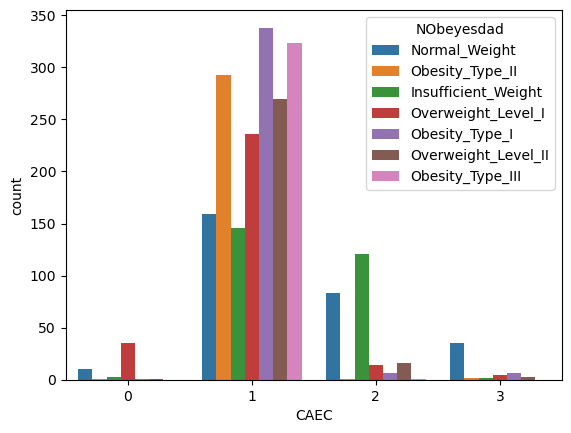

In [28]:
sns.countplot(x="CAEC",hue="NObeyesdad",data=df)
plt.show()

In [29]:
df=pd.get_dummies(df,columns=["SMOKE"],drop_first=True,dtype=int)

In [30]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,SMOKE_yes
0,21.000000,0,1.620000,64.000000,0,0,2.0,3.0,no,2.000000,yes,0.000000,1.000000,1,Public_Transportation,Normal_Weight,0
1,21.000000,0,1.520000,56.000000,1,0,3.0,3.0,yes,3.000000,yes,3.000000,0.000000,1,Public_Transportation,Normal_Weight,1
2,23.000000,1,1.800000,77.000000,2,0,2.0,3.0,no,2.000000,yes,2.000000,1.000000,1,Public_Transportation,Normal_Weight,0
3,27.000000,1,1.800000,87.000000,2,0,3.0,3.0,no,2.000000,no,2.000000,0.000000,1,Walking,Overweight_Level_I,0
4,22.000000,1,1.780000,89.800000,1,0,2.0,1.0,no,2.000000,no,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,1,1,3.0,3.0,no,1.728139,yes,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III,0
2107,21.982942,0,1.748584,133.742943,1,1,3.0,3.0,no,2.005130,yes,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III,0
2108,22.524036,0,1.752206,133.689352,1,1,3.0,3.0,no,2.054193,yes,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III,0
2109,24.361936,0,1.739450,133.346641,1,1,3.0,3.0,no,2.852339,yes,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III,0


# Obezite olan bireylerin çoğu sigara içmiyor bu yüzden "SMOKE_yes" değişkeni modellemeye dahil edilmemiştir. 

In [31]:
df.groupby("NObeyesdad")["SMOKE_yes"].value_counts()

NObeyesdad           SMOKE_yes
Insufficient_Weight  0            271
                     1              1
Normal_Weight        0            274
                     1             13
Obesity_Type_I       0            345
                     1              6
Obesity_Type_II      0            282
                     1             15
Obesity_Type_III     0            323
                     1              1
Overweight_Level_I   0            287
                     1              3
Overweight_Level_II  0            285
                     1              5
Name: count, dtype: int64

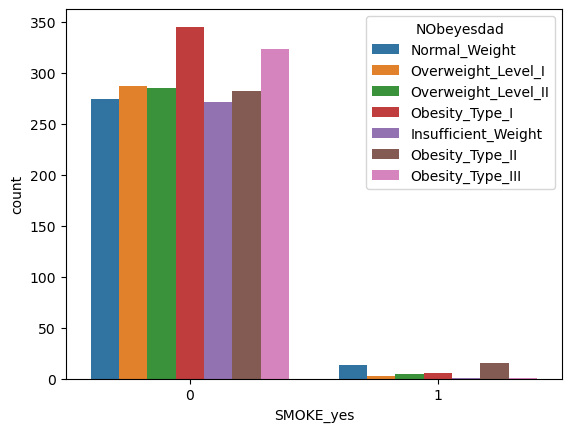

In [32]:
sns.countplot(x="SMOKE_yes",hue="NObeyesdad",data=df)
plt.show()

In [33]:
print(df['MTRANS'].unique())

['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


# MTRANS Değişkeni İşlenmesi
MTRANS sütunu, bireylerin günlük yaşamlarında tercih ettikleri ulaşım yöntemlerini göstermektedir. Bu sütundaki kategorik değerler şunlardır:

Walking (Yürüyerek)

Bike (Bisiklet)

Motorbike (Motosiklet)

Automobile (Araba)

Public_Transportation (Toplu taşıma)

Obezite ile ulaşım şekli arasında ilişki kurulabileceğinden bu değişken önemlidir. Ancak tüm kategorileri tek tek kullanmak modelin karmaşıklığını artırabileceği gibi, bazı sınıfların örnek sayısı da dengesiz olabilir.

Bu nedenle, sadece “yürüyerek ulaşımı tercih eden bireyler” üzerinde odaklanılarak, MTRANS sütunu ikili bir değişkene dönüştürülmüştür:

1 → Günlük ulaşımını yürüyerek sağlıyor

0 → Yürüyerek ulaşım harici başka bir yöntem kullanıyor

In [34]:
df = pd.get_dummies(df, columns=['MTRANS'], drop_first=True,dtype=int)

In [35]:
df = df[[col for col in df.columns if not col.startswith('MTRANS_') or col == 'MTRANS_Walking']]

In [36]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,SMOKE_yes,MTRANS_Walking
0,21.000000,0,1.620000,64.000000,0,0,2.0,3.0,no,2.000000,yes,0.000000,1.000000,1,Normal_Weight,0,0
1,21.000000,0,1.520000,56.000000,1,0,3.0,3.0,yes,3.000000,yes,3.000000,0.000000,1,Normal_Weight,1,0
2,23.000000,1,1.800000,77.000000,2,0,2.0,3.0,no,2.000000,yes,2.000000,1.000000,1,Normal_Weight,0,0
3,27.000000,1,1.800000,87.000000,2,0,3.0,3.0,no,2.000000,no,2.000000,0.000000,1,Overweight_Level_I,0,1
4,22.000000,1,1.780000,89.800000,1,0,2.0,1.0,no,2.000000,no,0.000000,0.000000,1,Overweight_Level_II,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,1,1,3.0,3.0,no,1.728139,yes,1.676269,0.906247,1,Obesity_Type_III,0,0
2107,21.982942,0,1.748584,133.742943,1,1,3.0,3.0,no,2.005130,yes,1.341390,0.599270,1,Obesity_Type_III,0,0
2108,22.524036,0,1.752206,133.689352,1,1,3.0,3.0,no,2.054193,yes,1.414209,0.646288,1,Obesity_Type_III,0,0
2109,24.361936,0,1.739450,133.346641,1,1,3.0,3.0,no,2.852339,yes,1.139107,0.586035,1,Obesity_Type_III,0,0


In [37]:
df.groupby("NObeyesdad")["MTRANS_Walking"].value_counts()

NObeyesdad           MTRANS_Walking
Insufficient_Weight  0                 266
                     1                   6
Normal_Weight        0                 255
                     1                  32
Obesity_Type_I       0                 349
                     1                   2
Obesity_Type_II      0                 296
                     1                   1
Obesity_Type_III     0                 324
Overweight_Level_I   0                 281
                     1                   9
Overweight_Level_II  0                 284
                     1                   6
Name: count, dtype: int64

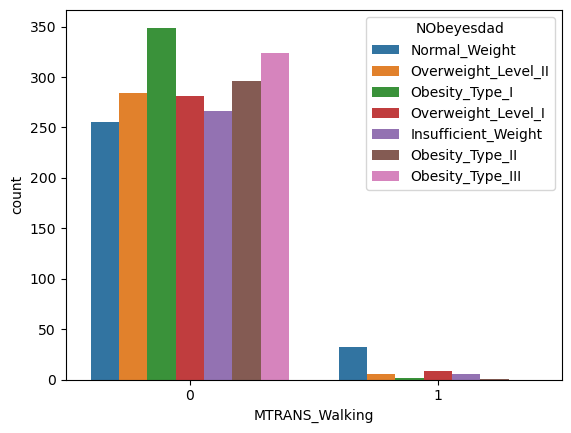

In [38]:
sns.countplot(x="MTRANS_Walking",hue="NObeyesdad",data=df)
plt.show()

In [39]:
df['family_history_with_overweight'] = (
    df['family_history_with_overweight'].str.strip().str.upper()
)

df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'YES': 1, 'NO': 0})

# family_history_with_overweight: Ailenizde fazla kilolu (obez) bireyler var mı sorusuna verilen cevaplardır.

In [40]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,SMOKE_yes,MTRANS_Walking
0,21.000000,0,1.620000,64.000000,0,0,2.0,3.0,no,2.000000,1,0.000000,1.000000,1,Normal_Weight,0,0
1,21.000000,0,1.520000,56.000000,1,0,3.0,3.0,yes,3.000000,1,3.000000,0.000000,1,Normal_Weight,1,0
2,23.000000,1,1.800000,77.000000,2,0,2.0,3.0,no,2.000000,1,2.000000,1.000000,1,Normal_Weight,0,0
3,27.000000,1,1.800000,87.000000,2,0,3.0,3.0,no,2.000000,0,2.000000,0.000000,1,Overweight_Level_I,0,1
4,22.000000,1,1.780000,89.800000,1,0,2.0,1.0,no,2.000000,0,0.000000,0.000000,1,Overweight_Level_II,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,1,1,3.0,3.0,no,1.728139,1,1.676269,0.906247,1,Obesity_Type_III,0,0
2107,21.982942,0,1.748584,133.742943,1,1,3.0,3.0,no,2.005130,1,1.341390,0.599270,1,Obesity_Type_III,0,0
2108,22.524036,0,1.752206,133.689352,1,1,3.0,3.0,no,2.054193,1,1.414209,0.646288,1,Obesity_Type_III,0,0
2109,24.361936,0,1.739450,133.346641,1,1,3.0,3.0,no,2.852339,1,1.139107,0.586035,1,Obesity_Type_III,0,0


In [41]:
df.groupby("NObeyesdad")["family_history_with_overweight"].value_counts()

NObeyesdad           family_history_with_overweight
Insufficient_Weight  0                                 146
                     1                                 126
Normal_Weight        1                                 155
                     0                                 132
Obesity_Type_I       1                                 344
                     0                                   7
Obesity_Type_II      1                                 296
                     0                                   1
Obesity_Type_III     1                                 324
Overweight_Level_I   1                                 209
                     0                                  81
Overweight_Level_II  1                                 272
                     0                                  18
Name: count, dtype: int64

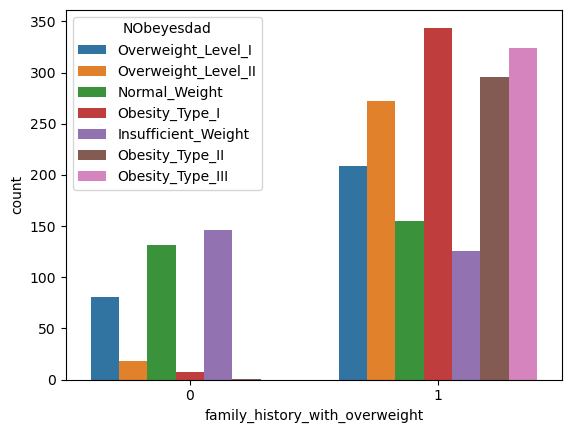

In [42]:
sns.countplot(x="family_history_with_overweight",hue="NObeyesdad",data=df)
plt.show()

# HEDEF DEĞİŞKEN ANALİZİ
# NObeyesdad: Kişinin Obezite Seviyesi

In [43]:
df["NObeyesdad"].value_counts()  # Target Analizi

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

# HEDEF DEĞİŞKEN VE SAYISAL ÖZELLİKLER İNCELEMESİ

In [44]:
def summary(dataframe,target,col): # Target and Features Analizi
    print(dataframe.groupby(target)[col].mean())

In [45]:
for col in df[["Age","Height","Weight","FAF","TUE","CH2O","NCP","FCVC"]]:
    summary(df,"NObeyesdad",col)

NObeyesdad
Insufficient_Weight    19.783237
Normal_Weight          21.738676
Obesity_Type_I         25.884941
Obesity_Type_II        28.233785
Obesity_Type_III       23.495554
Overweight_Level_I     23.417674
Overweight_Level_II    26.996981
Name: Age, dtype: float64
NObeyesdad
Insufficient_Weight    1.691117
Normal_Weight          1.676585
Obesity_Type_I         1.693804
Obesity_Type_II        1.771795
Obesity_Type_III       1.687559
Overweight_Level_I     1.687836
Overweight_Level_II    1.703748
Name: Height, dtype: float64
NObeyesdad
Insufficient_Weight     49.906330
Normal_Weight           62.155052
Obesity_Type_I          92.870198
Obesity_Type_II        115.305311
Obesity_Type_III       120.941114
Overweight_Level_I      74.266828
Overweight_Level_II     82.085271
Name: Weight, dtype: float64
NObeyesdad
Insufficient_Weight    1.250131
Normal_Weight          1.247387
Obesity_Type_I         0.986748
Obesity_Type_II        0.971857
Obesity_Type_III       0.664817
Overweight_Level_I 

In [46]:
def plot_numerical_col(dataframe,numerical_col): # Features Analizi
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

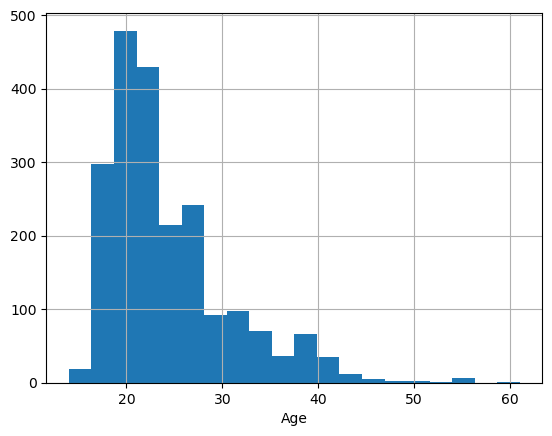

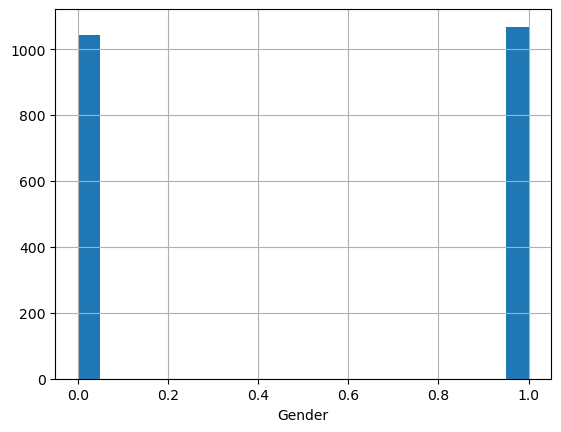

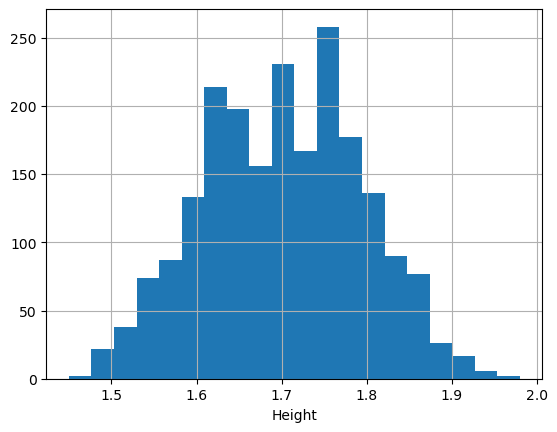

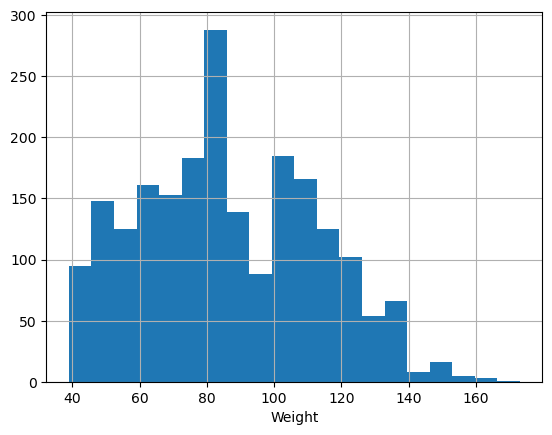

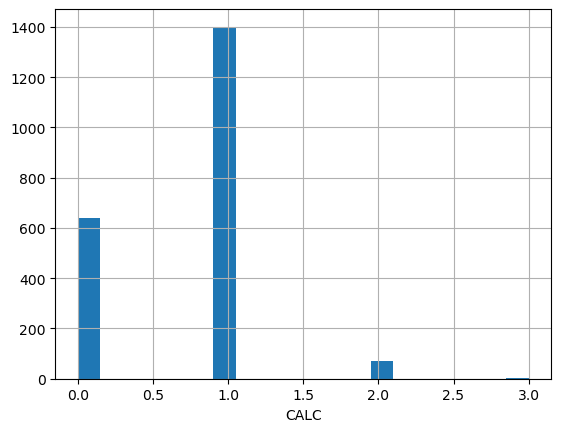

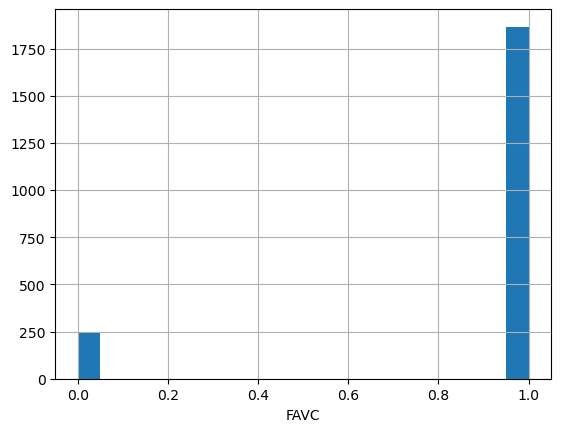

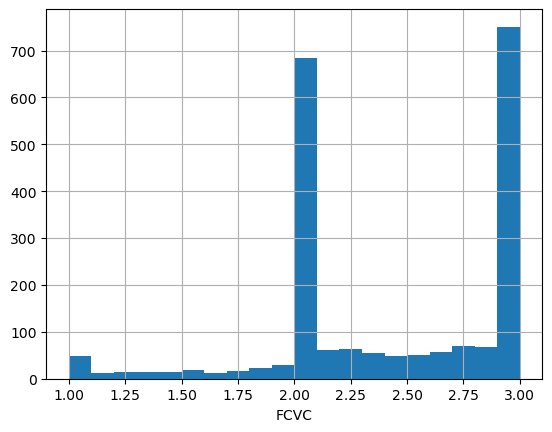

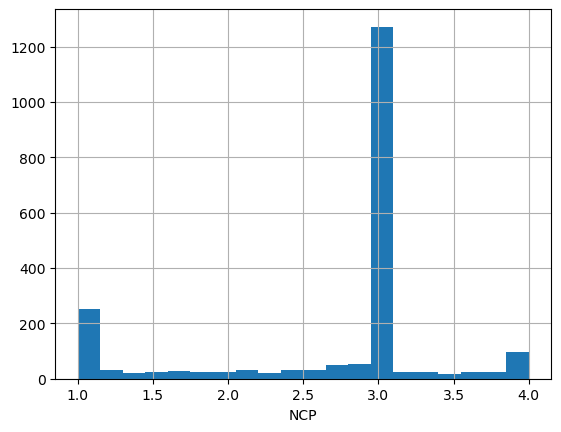

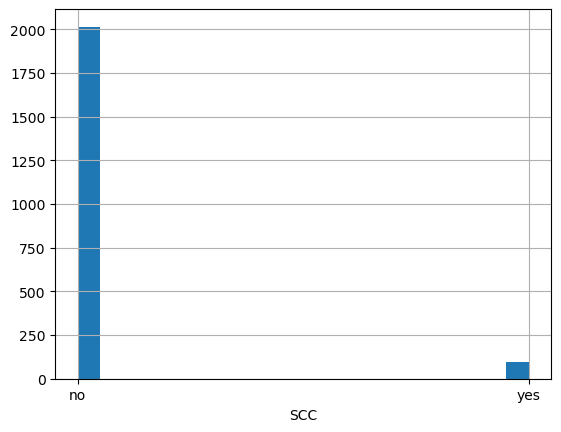

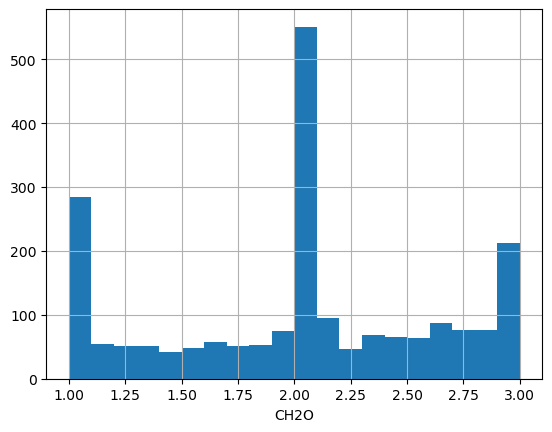

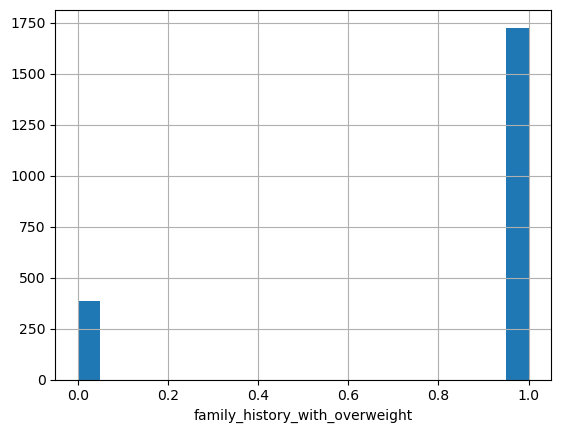

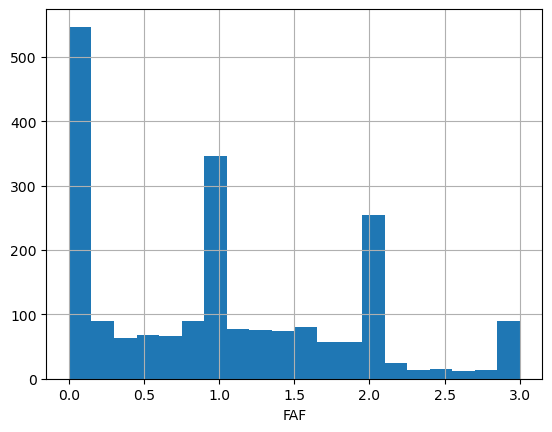

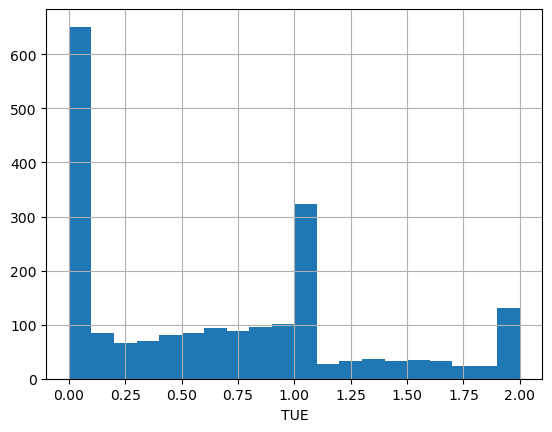

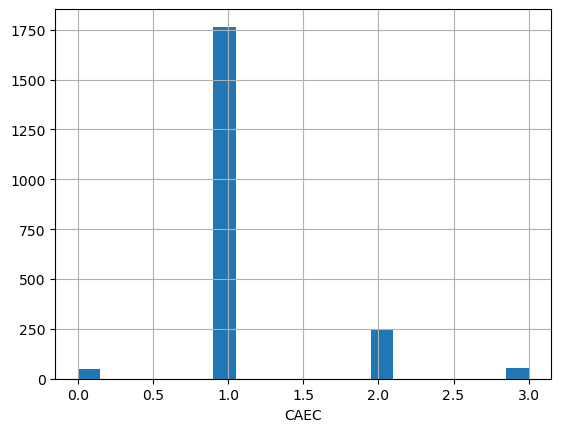

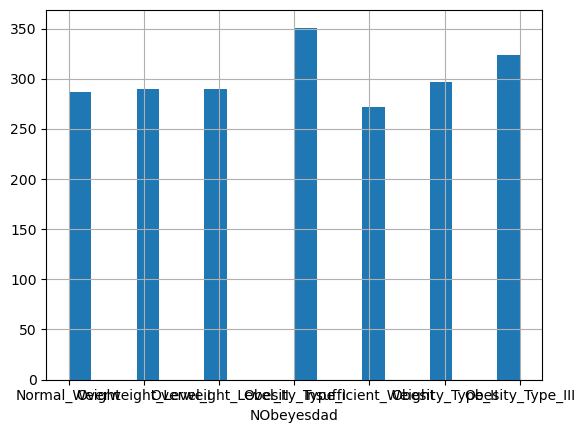

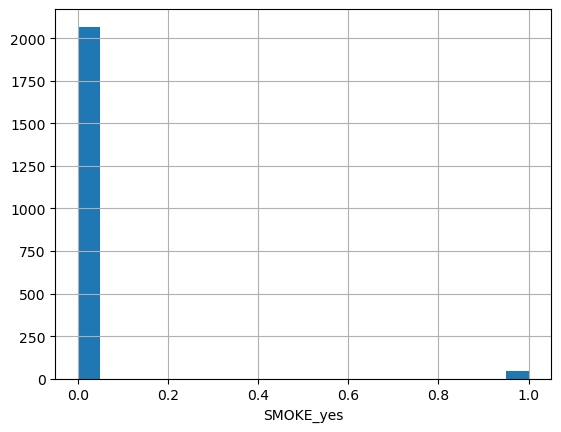

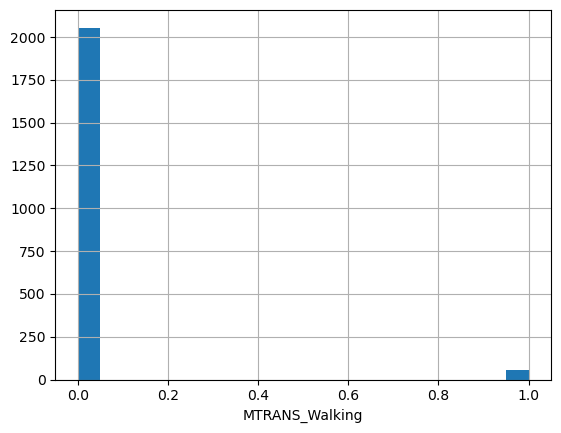

In [47]:
for col in df.columns:
    plot_numerical_col(df,col)

# BMI ÖZELLİĞİNİ EKLEME

In [48]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2) 

In [49]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,SMOKE_yes,MTRANS_Walking,BMI
0,21.000000,0,1.620000,64.000000,0,0,2.0,3.0,no,2.000000,1,0.000000,1.000000,1,Normal_Weight,0,0,24.386526
1,21.000000,0,1.520000,56.000000,1,0,3.0,3.0,yes,3.000000,1,3.000000,0.000000,1,Normal_Weight,1,0,24.238227
2,23.000000,1,1.800000,77.000000,2,0,2.0,3.0,no,2.000000,1,2.000000,1.000000,1,Normal_Weight,0,0,23.765432
3,27.000000,1,1.800000,87.000000,2,0,3.0,3.0,no,2.000000,0,2.000000,0.000000,1,Overweight_Level_I,0,1,26.851852
4,22.000000,1,1.780000,89.800000,1,0,2.0,1.0,no,2.000000,0,0.000000,0.000000,1,Overweight_Level_II,0,0,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,0,1.710730,131.408528,1,1,3.0,3.0,no,1.728139,1,1.676269,0.906247,1,Obesity_Type_III,0,0,44.901475
2107,21.982942,0,1.748584,133.742943,1,1,3.0,3.0,no,2.005130,1,1.341390,0.599270,1,Obesity_Type_III,0,0,43.741923
2108,22.524036,0,1.752206,133.689352,1,1,3.0,3.0,no,2.054193,1,1.414209,0.646288,1,Obesity_Type_III,0,0,43.543817
2109,24.361936,0,1.739450,133.346641,1,1,3.0,3.0,no,2.852339,1,1.139107,0.586035,1,Obesity_Type_III,0,0,44.071535


In [50]:
df.groupby("NObeyesdad")["BMI"].mean()

NObeyesdad
Insufficient_Weight    17.404245
Normal_Weight          22.014147
Obesity_Type_I         32.255636
Obesity_Type_II        36.723424
Obesity_Type_III       42.273746
Overweight_Level_I     25.990772
Overweight_Level_II    28.215232
Name: BMI, dtype: float64

# VERİYİ ÖLÇEKLENDİRME

In [51]:
for col in df[["Gender","FAVC","CAEC","MTRANS_Walking","family_history_with_overweight","CALC","BMI","Age","Height","Weight","FCVC","NCP","CH2O","TUE","FAF"]]: # Gerekli sütunları seçme
    df[col]=RobustScaler().fit_transform(df[[col]]) # RobustScaler ile verileri ölçeklendirme (RobustScaler aykırı değerlere daha dayanıklıdır.)

# VERİYİ AYIRMA

"SCC" değişkeni sınıflar arasında anlamlı bir ayrım göstermediği ve çoğu birey aynı kategoride yer aldığı için modellemeye dahil edilmemiştir. Bu sayede modelde gereksiz gürültüden kaçınılmıştır. (SCC: Kişi günlük kalori alımını takip ediyor mu? (Kendini kontrol ediyor mu?))

In [52]:
y=df["NObeyesdad"] 
x=df[["Gender","FAVC","CAEC","MTRANS_Walking","family_history_with_overweight","CALC","BMI","Age","Height","Weight","FCVC","NCP","CH2O","TUE","FAF"]]

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42) # Eğitim ve test verisi olarak ayırma

# LOGISTIC REGRESSION

In [75]:
log_model=LogisticRegression().fit(x_train,y_train) # Lojistik Regresyon ile model kurma

In [76]:
y_pred=log_model.predict(x_test)

In [77]:
y_prob=log_model.predict_proba(x_test)[:,1]

In [78]:
print(classification_report(y_test,y_pred)) # Tahmin değerlerini gözlemleme

                     precision    recall  f1-score   support

Insufficient_Weight       0.88      1.00      0.93        56
      Normal_Weight       0.91      0.66      0.77        62
     Obesity_Type_I       0.96      0.91      0.93        78
    Obesity_Type_II       0.90      0.98      0.94        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.75      0.77      0.76        56
Overweight_Level_II       0.75      0.86      0.80        50

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.89      0.88      0.88       423



# KNN

In [79]:
knn_model=KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

In [80]:
y_pred=knn_model.predict(x_test)

In [81]:
print(classification_report(y_test,y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.89      0.85        56
      Normal_Weight       0.82      0.52      0.63        62
     Obesity_Type_I       0.85      0.91      0.88        78
    Obesity_Type_II       0.93      0.98      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.68      0.79      0.73        56
Overweight_Level_II       0.82      0.82      0.82        50

           accuracy                           0.85       423
          macro avg       0.85      0.84      0.84       423
       weighted avg       0.85      0.85      0.84       423



# DECISION TREE

In [82]:
tree_model=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=42)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [83]:
y_pred=tree_model.predict(x_test)
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.96      0.95        55
      Normal_Weight       0.97      0.91      0.94        66
     Obesity_Type_I       0.95      1.00      0.97        74
    Obesity_Type_II       1.00      0.94      0.97        62
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.88      0.98      0.92        50
Overweight_Level_II       0.98      0.92      0.95        53

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



# SVM 

In [84]:
svm_model=SVC(kernel="linear",random_state=42)

In [85]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [86]:
y_pred=svm_model.predict(x_test)
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.92      0.96        61
      Normal_Weight       0.84      1.00      0.91        52
     Obesity_Type_I       0.97      0.99      0.98        77
    Obesity_Type_II       1.00      0.97      0.98        60
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.96      0.89      0.92        61
Overweight_Level_II       0.94      0.96      0.95        49

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



# NAIVE BAYES

In [87]:
nb_model=GaussianNB().fit(x_train,y_train)

In [88]:
y_pred=nb_model.predict(x_test)
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.85      0.92        66
      Normal_Weight       0.76      0.89      0.82        53
     Obesity_Type_I       0.78      0.95      0.86        64
    Obesity_Type_II       0.98      0.80      0.88        71
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.88      0.89      0.88        55
Overweight_Level_II       0.90      0.88      0.89        51

           accuracy                           0.89       423
          macro avg       0.90      0.89      0.89       423
       weighted avg       0.91      0.89      0.90       423



# ACCURACY DEĞERLERİ : 
# Logistic Regression : 0.88
# KNN : 0.85 
# Decision Tree : 0.96
# SVM : 0.96
# Naive Bayes : 0.89